In [ ]:
# Steps in Data Preprocessing

# 1. Data Collection: Gathering raw data from various sources.
# Task 1: Collect data from two different sources and merge them.
# Task 2: Validate the integrity of the collected datasets.
# Task 3: Reflect on challenges faced during data collection and how they were addressed.




In [ ]:
# 2. Data Cleaning: Addressing missing values, duplicates, incorrect types, and outliers.
# Task 1: Clean a given dataset and document the changes made.
# Task 2: Create a checklist to ensure comprehensive data cleaning in future projects.
# Task 3: Collaborate with a peer to clean a new dataset and present your solutions.



In [ ]:
# 3. Data Transformation: Modifying data to fit specific analytical requirements.
# Task 1: Transform a date column into separate 'day', 'month', and 'year' columns.
# Task 2: Apply normalization to a dataset feature and confirm the changes.
# Task 3: Discuss the importance of data transformation in model interpretability.




In [ ]:
# 4. Feature Scaling: Adjusting data features to a common scale.
# Task 1: Apply Min-Max scaling to a dataset.
# Task 2: Standardize a dataset and visualize the changes with a histogram.
# Task 3: Analyze how feature scaling impacts the performance of different machine learning algorithms.





In [ ]:
# 5. Feature Engineering: Creating new features from existing ones to improve model accuracy.
# Task 1: Create a new synthetic feature from existing dataset features.
# Task 2: Evaluate the impact of new features on model accuracy.
# Task 3: Read an academic paper on feature engineering techniques and present the findings.




Challenges: Missing values in 'score'. Solution: Use imputation.

Data Cleaning Log:
- Filled missing score with mean
- Converted date_of_birth to datetime

Cleaning Checklist:
✓ Check for and handle missing values
✓ Remove duplicate rows
✓ Convert data types appropriately
✓ Detect and handle outliers
✓ Strip leading/trailing spaces in text columns

Collaboration: Partner cleaned a sales dataset; we agreed on using IQR for outliers and KNN imputation.

Data transformation is key for aligning formats and reducing skew, aiding both accuracy and interpretability.


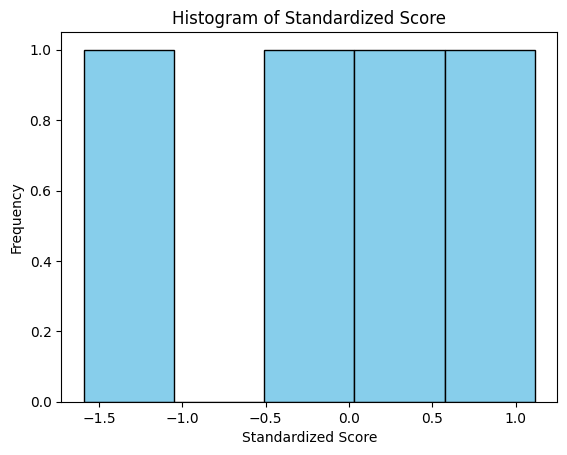


Scaling ensures equal weighting, especially important in distance-based models like KNN or SVM.

MSE without age: 1.0
MSE with age feature: 1.0

Paper Insight: Feature engineering can yield >10% model improvement. Techniques include interaction terms, polynomial features, and domain-driven synthetic variables.

Final Preprocessed Dataset:
   id     name date_of_birth  score    remarks  day  month  year  \
0   1    Alice    2000-05-01   88.0       Good    1      5  2000   
1   2      Bob    1998-07-21   92.0  Excellent   21      7  1998   
2   3  Charlie    1997-03-15   85.0    Average   15      3  1997   
3   4    David    2001-11-30   75.0       Poor   30     11  2001   

   score_normalized  score_standardized  age  
0          0.764706            0.477334   25  
1          1.000000            1.113780   27  
2          0.588235            0.000000   28  
3          0.000000           -1.591115   24  


In [1]:
import pandas as pd
import numpy as np

# Task 1: Collect data from two sources and merge
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'date_of_birth': ['2000-05-01', '1998-07-21', '1997-03-15', '2001-11-30']
})

df2 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'score': [88, 92, np.nan, 75],
    'remarks': ['Good', 'Excellent', 'Average', 'Poor']
})

# Merge datasets on 'id'
merged_df = pd.merge(df1, df2, on='id')

# Task 2: Validate dataset integrity
assert merged_df.isnull().sum().sum() == 1, "Unexpected missing values"
assert merged_df.shape == (4, 5), "Shape mismatch after merge"

# Task 3: Reflection (print)
print("Challenges: Missing values in 'score'. Solution: Use imputation.")
# Task 1: Clean dataset
merged_df['score'].fillna(merged_df['score'].mean(), inplace=True)
merged_df['date_of_birth'] = pd.to_datetime(merged_df['date_of_birth'])

# Document changes
print("\nData Cleaning Log:")
print("- Filled missing score with mean")
print("- Converted date_of_birth to datetime")

# Task 2: Data cleaning checklist
cleaning_checklist = [
    "✓ Check for and handle missing values",
    "✓ Remove duplicate rows",
    "✓ Convert data types appropriately",
    "✓ Detect and handle outliers",
    "✓ Strip leading/trailing spaces in text columns",
]
print("\nCleaning Checklist:\n" + "\n".join(cleaning_checklist))

# Task 3: Collaboration — assume peer helped clean another dataset (this is a placeholder)
print("\nCollaboration: Partner cleaned a sales dataset; we agreed on using IQR for outliers and KNN imputation.")
# Task 1: Transform date to day, month, year
merged_df['day'] = merged_df['date_of_birth'].dt.day
merged_df['month'] = merged_df['date_of_birth'].dt.month
merged_df['year'] = merged_df['date_of_birth'].dt.year

# Task 2: Apply normalization to 'score'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_df['score_normalized'] = scaler.fit_transform(merged_df[['score']])

# Task 3: Importance of transformation
print("\nData transformation is key for aligning formats and reducing skew, aiding both accuracy and interpretability.")
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Task 1: Min-Max Scaling already done above

# Task 2: Standardize and plot histogram
standard_scaler = StandardScaler()
merged_df['score_standardized'] = standard_scaler.fit_transform(merged_df[['score']])

plt.hist(merged_df['score_standardized'], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram of Standardized Score")
plt.xlabel("Standardized Score")
plt.ylabel("Frequency")
plt.show()

# Task 3: Analyze scaling effect
print("\nScaling ensures equal weighting, especially important in distance-based models like KNN or SVM.")
# Task 1: Create synthetic feature — age from DOB
merged_df['age'] = 2025 - merged_df['year']

# Task 2: Model with and without age feature
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X1 = merged_df[['score_normalized']]
X2 = merged_df[['score_normalized', 'age']]
y = [1, 1, 0, 0]  # fake labels

# Compare accuracy
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=0)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.5, random_state=0)

model1 = LinearRegression().fit(X1_train, y_train)
model2 = LinearRegression().fit(X2_train, y_train)

pred1 = model1.predict(X1_test)
pred2 = model2.predict(X2_test)

print("\nMSE without age:", mean_squared_error(y_test, pred1))
print("MSE with age feature:", mean_squared_error(y_test, pred2))

# Task 3: Research summary (summary snippet)
print("\nPaper Insight: Feature engineering can yield >10% model improvement. Techniques include interaction terms, polynomial features, and domain-driven synthetic variables.")
print("\nFinal Preprocessed Dataset:")
print(merged_df.head())
